In [1]:
!python -m pip install -e . >> /dev/null

In [2]:
import toolviper
import xradio
import pathlib
import numba

import numpy as np
import pandas as pd

from calviper.factory.jones import CalibrationMatrix

from xradio import measurement_set as ms

In [3]:
if not pathlib.Path.cwd().joinpath("data/gaincaltest2.ps.zarr").exists():
    toolviper.utils.data.download("gaincal.test.zarr", "data")

In [4]:
ps = ms.open_processing_set("data/gaincaltest2.ps.zarr")

sub_ps = ps.sel(intents="CALIBRATE_DELAY#ON_SOURCE", scan_number=2)
sub_ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
1,gaincaltest2_0,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_1#SW-01#FULL_RES_0,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",8.607155e+10,8.629030e+10
0,gaincaltest2_2,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_2#SW-01#FULL_RES_1,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",8.794655e+10,8.816530e+10
3,gaincaltest2_4,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_3#SW-01#FULL_RES_2,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",9.632156e+10,9.654030e+10
2,gaincaltest2_6,"[CALIBRATE_DELAY#ON_SOURCE, CALIBRATE_PHASE#ON...","(957, 45, 8, 4)","[XX, XY, YX, YY]","[2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]",X0000000000#ALMA_RB_03#BB_4#SW-01#FULL_RES_3,[J2255-3500_0],[J2255-3500_0],[],"[icrs, 22h55m57.68s, -35d00m00.00s]",9.819656e+10,9.841530e+10


In [5]:
sps = sub_ps["gaincaltest2_0"]

In [6]:
cmatrix = CalibrationMatrix()

In [7]:
jones = cmatrix.create_jones("gain").empty_like(sps)

[2025-02-06 13:33:15,444]     INFO    viperlog:  Module path: /home/mystletainn/Development/calviper/src/calviper 


In [8]:
jones

<xarray.Dataset> Size: 3MB
Dimensions:       (time: 957, antenna: 9, frequency: 8, polarization: 2,
                   scan_id: 957, baseline_id: 45)
Coordinates:
  * time          (time) float64 8kB 1.503e+09 1.503e+09 ... 1.503e+09 1.503e+09
  * antenna       (antenna) <U9 324B 'DA41_A110' 'DA42_A123' ... 'DA49_A127'
  * frequency     (frequency) float64 64B 8.607e+10 8.61e+10 ... 8.629e+10
  * polarization  (polarization) <U1 8B 'X' 'Y'
  * scan_id       (scan_id) int64 8kB 2 2 2 2 2 2 2 2 ... 26 26 26 26 26 26 26
  * baseline_id   (baseline_id) int64 360B 0 1 2 3 4 5 6 ... 39 40 41 42 43 44
Data variables:
    PARAMETER     (time, antenna, frequency, polarization) float64 1MB nan .....
    WEIGHT        (time, antenna, frequency, polarization) float64 1MB 0.0 .....
    FLAG          (time, antenna, frequency, polarization) float64 1MB 0.0 .....
Attributes:
    calibration_type:  gain
    observation_info:  {'observer': ['lknee'], 'project': 'uid://A002/X1f841f...

### Functions that use the xarray data to perform some extended calcualtion are found under `gain`. Below we add an empty gain matrix to the jones object.

In [9]:
jones.gain.example()

[2025-02-06 13:33:15,481]     INFO    viperlog:  This is a gain matrix specific function that does something with the data. 


In [10]:
jones.gain.empty()

In [11]:
jones

<xarray.Dataset> Size: 14MB
Dimensions:       (time: 957, antenna: 9, frequency: 8, polarization: 2,
                   scan_id: 957, baseline_id: 45, p: 2, q: 2)
Coordinates:
  * time          (time) float64 8kB 1.503e+09 1.503e+09 ... 1.503e+09 1.503e+09
  * antenna       (antenna) <U9 324B 'DA41_A110' 'DA42_A123' ... 'DA49_A127'
  * frequency     (frequency) float64 64B 8.607e+10 8.61e+10 ... 8.629e+10
  * polarization  (polarization) <U1 8B 'X' 'Y'
  * scan_id       (scan_id) int64 8kB 2 2 2 2 2 2 2 2 ... 26 26 26 26 26 26 26
  * baseline_id   (baseline_id) int64 360B 0 1 2 3 4 5 6 ... 39 40 41 42 43 44
Dimensions without coordinates: p, q
Data variables:
    PARAMETER     (time, antenna, frequency, polarization) float64 1MB nan .....
    WEIGHT        (time, antenna, frequency, polarization) float64 1MB 0.0 .....
    FLAG          (time, antenna, frequency, polarization) float64 1MB 0.0 .....
    MATRIX        (time, baseline_id, frequency, p, q) complex64 11MB (1+0j) ...
Attributes:
    calibration_type:  gain
    observation_info:  {'observer': ['lknee'], 'project': 'uid://A002/X1f841f...

In [12]:
jones.gain.type

'G'

(array([174.,  87.,  87.,  87.,   0., 174.,  87.,  87.,  87.,  87.]),
 array([ 2. ,  4.4,  6.8,  9.2, 11.6, 14. , 16.4, 18.8, 21.2, 23.6, 26. ]),
 <BarContainer object of 10 artists>)

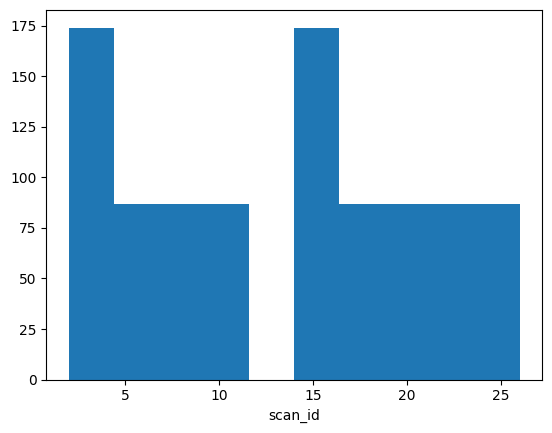

In [13]:
jones.scan_id.plot.hist()

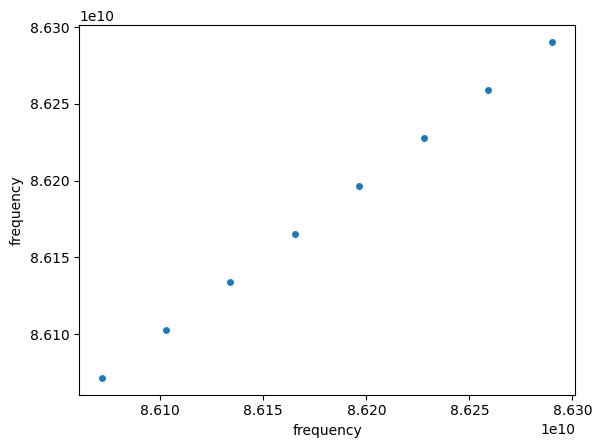

In [14]:
jones.frequency.plot.scatter()